# Taller 3
1. [Función  que dada una ruta de archivo de VBox lea los datos y trabaje que con ellos.](#primero) **La función debe servir para los dos tipos de archivos VBox**.

1. [Comparar el rendimiento de combustión interna con el kart eléctrico en términos de tiempo de vuelta, velocidades instantáneas y aceleraciones, comparación y discusión.](#segundo)

1. [A partir de los modelos del taller anterior, analizar el desempeño de los motores de combustión interna y eléctrico y comparar el momento par, la potencia y la velocidad de giro.](#tercero)

1. [Sugerir posibles mejoras al kart eléctrico para acercar su desempeño al del kart de combustión interna.](#cuarto)

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import os
from scipy import ndimage


Populating the interactive namespace from numpy and matplotlib


## 1. Función para la lectura de los datos de ambos tipos de VBox <a name="primero"></a>

In [2]:
def load(base_dir,data_file):
    with open(os.path.join(base_dir,data_file), 'r') as vboxdata:
        section = []
        time = []
        lat = []
        long = []
        vel = []
        height = []
        vertv = []
        for line in vboxdata:
            if line[0] == '[':
                section = str.replace(line, "\n","")
                continue
            if section == '[column names]':
                col_names = str.replace(line, "  \n","").split('  ')
                section = []
            if section == '[data]':
                linesplit = str.replace(line, " \n","").split(' ')
                time.append(float(linesplit[1][0:2])*3600+float(linesplit[1][2:4])*60+float(linesplit[1][4:]))
                lat.append(float(linesplit[2]))
                long.append(float(linesplit[3]))
                vel.append(float(linesplit[4]))
                height.append(float(linesplit[6]))
                vertv.append(float(linesplit[7]))

    time = np.asarray(time)
    lat = np.asarray(lat)
    long = np.asarray(long)
    vel = np.asarray(vel)
    height = np.asarray(height)
    vertv = np.asarray(vertv)
    time_base = time[0]
    time = time - time_base
    lat = lat/60.0
    long = -long/60.0
    dt = time[1]-time[0]
    return time,lat,long,vel,height,vertv,time_base,dt

In [44]:
def accel(vx, ddt):
    return ndimage.gaussian_filter1d(vx, sigma=20, order=1, mode='wrap') / ddt

Archivo de kart eléctrico seleccionado

In [3]:
carpeta1 = 'data_electrico'
file1 = 'VBS__052.VBO'

Datos medidos por el VBox 

In [4]:
kartelectric = load(carpeta1,file1)
tiempoele = kartelectric[0]
latitudele = kartelectric[1]
longitudele = kartelectric[2]
velocidadele = kartelectric[3]
alturaele = kartelectric[4]
velocidadvertele =  kartelectric[5]
tiempobaseele = kartelectric[6]
deltaele = kartelectric[7]


Gráfica de la primera vuelta seleccionada

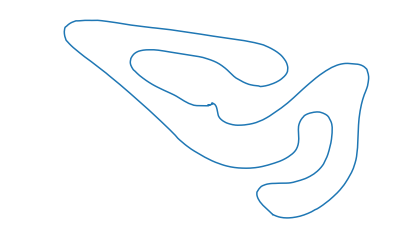

In [75]:
nele1 = 3620
nele2 = 5520
lele1 = longitudele[nele1:nele2]
latele1 = latitudele[nele1:nele2]
plt.plot(lele1,latele1)
plt.axis('off')
plt.show()

Tiempo transcurrido en la primera vuelta seleccionada

In [76]:
tele1 = tiempoele[nele1:nele2] 
tiempovueltaele1 = tele1-tele1[0]
tiempototalele1 = tiempovueltaele1[-1]
tiempototalele1

282.30000000000291

Gráfica de las velocidades registradas en la primera vuelta 

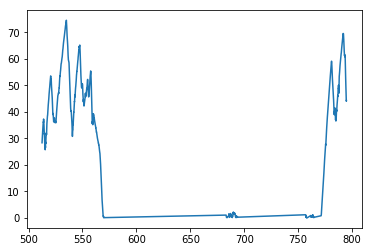

In [77]:
vele1 = velocidadele[nele1:nele2]
plt.plot(tele1,vele1)
plt.show()

Como hay un momento en el que el kart se detiene se revisa primero la velocidad en función del tiempo

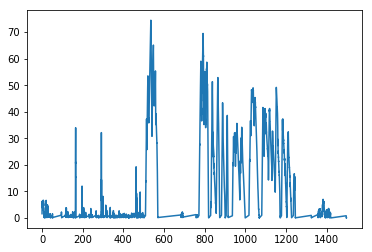

In [79]:
plt.plot(tiempoele,velocidadele)
plt.show()

Se eligen los datos un poco antes de 800 segundos donde el kart no paró

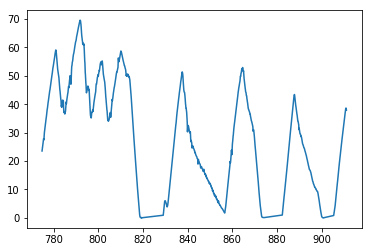

In [38]:
nele3 = 5120
nele4 = 7407
plt.plot(tiempoele[5120:7407],velocidadele[5120:7407])
plt.show()

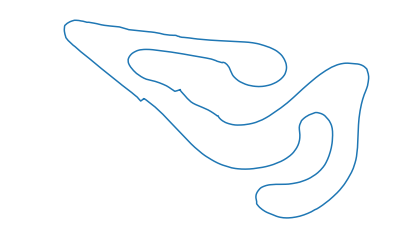

In [39]:
plt.plot(longitudele[5120:7407],latitudele[5120:7407])
plt.axis('off')
plt.show()

In [40]:
tiempovueltaele2 = tiempoele[5120:7407]-tiempoele[5120]
tiempototalele2 = tiempovueltaele2[-1]
tiempototalele2

136.25

La aceleración en esta vuelta fue de

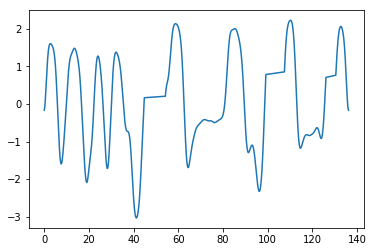

In [71]:
acelele = accel(velocidadele[5120:7407]/3.6,deltaele)
plt.plot(tiempovueltaele2,acelele)
plt.show()

Archivo del kart a gasolina seleccionado 

In [12]:
carpeta2 = 'Data'
file2 = 'VBOX0020.VBO'

Datos medidos por el VBox 

In [13]:
kartgaso = load(carpeta2,file2)
tiempogas = kartgaso[0]
latitudgas = kartgaso[1]
longitudgas = kartgaso[2]
velocidadgas = kartgaso[3]
alturagas = kartgaso[4]
velocidadvertgas =  kartgaso[5]
tiempobasegas = kartgaso[6]
deltagas = kartgaso[7]

Gráfica de la primera vuelta seleccionada

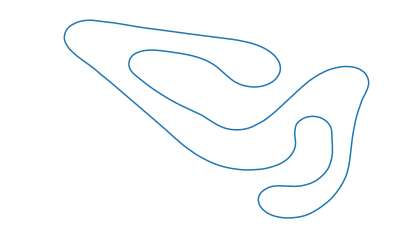

In [14]:
plt.plot(longitudgas[3000:8432],latitudgas[3000:8432])
plt.axis('off')
plt.show()

Tiempo transcurrido en la primera vuelta seleccionada

In [15]:
tiempovueltagas = tiempogas[3000:8432]-tiempogas[3000]
tiempototalgas = tiempovueltagas[-1]
tiempototalgas

54.310000000004948

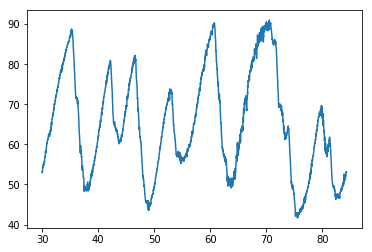

In [16]:
plt.plot(tiempogas[3000:8432],velocidadgas[3000:8432])
plt.show()

Para verificar que sea una un tiempo y velocidad óptimo se gráfican todos los datos de velocidad medidos

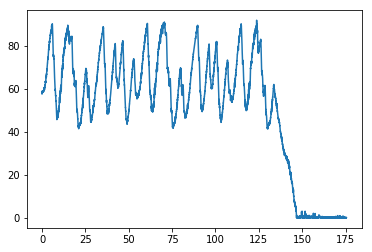

In [41]:
plt.plot(tiempogas,velocidadgas)
plt.show()

Como los datos seleccionados estan entre el rango de los 30 y 85 segundos se asume una selección adecuada de vuelta

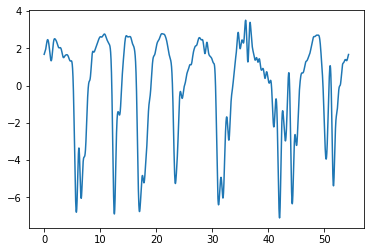

In [70]:
acelgas = accel(velocidadgas[3000:8432]/3.6,deltagas)
plt.plot(tiempovueltagas,acelgas)
plt.show()

### Funciones para encontrar comparar desempeño, momento par, potencia y velocidad de giro

Parámetros del kart eléctrico

In [58]:
dpl = 39 # Dientes plato
dpi = 11 # Dientes piñon 
n = dpl/dpi # Relación 
eta = 0.95 # Eficiencia en la transmisión

rt = 0.139 # Radio geométrico de la llanta [m] 
refe = 0.98*rt # Radio efectivo trasero [m]

rho = 1.1955 # Densidad del aire [kg/m^3]
dlld = 0.975 # Distancia entre llantas delanteras [m]
alpi = 0.88 # Altura del piloto sentado [m]
Af = dlld * alpi # Área frontal [m^2]
Ca = 0.89 # Coeficinete de arrastre




Im = 5.3E-3 # Inercia del motor eléctrico [kg^2]
mt = 1.43 # Masa llanta trasera[kg]
md = 1.2 # Masa llanta delantera [kg]
rd = 0.129 # Radio llanta delantera[m]
rrid = 0.0631 # Radio del rin delantero[m]
rrit = rrid # Radio del rin trasero[m]

mbant = 0.7*mt # Masa de la banda en la llanta trasera [kg]
mdisct = 0.3*mt #Masa del disco en la llanta trasera [kg]
mband = 0.7*mt # Masa de la banda en la llanta delantera [kg]
mdiscd = 0.3*mt # Masa del disco en la llanta delantera [kg]

Id = (mband*rd)+(mdiscd*(rd**2-rrid**2))/2 # Inercia de la llanta delantera [kg m^2]
It = (mbant*rt)+(mdisct*(rt**2-rrit**2))/2 # Inercia de la llanta trasera [kg m^2]

reje = 0.02 # Radio del eje de las llantas [m]
meje = 3.832 # Masa del eje de las llantas [kg]
Ieje = (meje*reje**2)/2 # Inercia del eje de las llantas [kg m^2]


mK = 152 # Masa del kart [kg]
mP = 62 # Masa del piloto [kg]
g = 9.81 # Aceleración gravitacional [m/s^2]
pesoK = mK*g  # Peso del kart [N]


In [59]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
refc=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)

# Datos Transmisión
dp=11.0 # Dientes del piñon
dpl=87.0 # Dientes del plato
ng=dpl/dp # Relación de Transmisión
etaf=0.95 # Eficiencia de transmisión

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)

# Datos Kart general
masa=140.0 # masa del Kart con piloto(kg)
g=9.81 # Gravedad (m/s)
w=masa*g # peso del Kart (N)

# Datos Fuerzas de la fórmula de aceleración
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera

# Inercias
ii=0.01 # Inercia motor de combustión 

mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

rpi=0.01525 # Radio Piñon (m)
rpla=0.10775 # Radio Plato (m)
rhoac=7850.0 # Densidad del Acero (kg/m^3)
bpi=0.01 # Ancho piñon (m)
bpla=0.01 # Ancho plato (m)
vpi= bpi*np.pi*rpi**2 # Volumen del piñon (m^3)
vpla=bpla*np.pi*rpla**2 # Volumen del plato (m^3)
mpi=rhoac*vpi # Masa del piñon (kg)
mpla=rhoac*vpla # Masa del plato (kg)
ig=((mpi*(rpi**2))/2)+((mpla*(rpla**2))/2) # Inercia de la transmisión (kg-m^2)

ieje=(meje*reje**2)/2 # Inercia del eje de las llantas (kg-m^2)

# Fuerzas Aceleración
# Resistencia a la rodadura
a=0.2036 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.0960 # Altura del centro de gravedad del kart con respecto al piso (m)

In [60]:
# Función de fuerza de arrastre
def arraste (V):
    A = 0.5*rho*Af*Ca*V**2
    return A

In [61]:
# Función de fuerza de rodadura
def frodadura(vx,ax):
    wr=w*((a/l)+(ax/g*(h/l))) # fuerza vertical sobre las llantas tractivas
    fr=0.01*(1+(vx/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)

In [62]:
# Función de fuerza de tracción
def ftraccion(ax,Fg,Fw,Fr):
    return masa*ax+Fg+Fw+Fr

In [63]:
# Función de torque del motor
def torquemotor(ax,Ft,rela,imotor):
    return (Ft+(((imotor-ig)/(rela**2))+ieje+illd*2+illt*2)*(ax/(refc**2)))*(refc/(rela*etaf)) # Torque del motor (Nm)

In [65]:
# Función de velocidad de giro
def vangularmotor(vx,rela):
    return (vx*rela)/refc # (rad/s)

In [67]:
# Función de potencia
def potencia(omega,Tor):
    p = omega*T/1000
    return p

In [ ]:
arrastreele = arraste(velocidadele)